In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter
import seaborn as sns
from mpl_finance import candlestick_ohlc 
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('../dataset/GOOG-year.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
1,2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2,2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
3,2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
4,2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1350800


In [4]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1350800


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,879.093372,884.680774,873.167521,879.446549,879.446549,1.554527e+06
std,74.405990,75.014245,73.978346,74.622152,74.622152,6.822470e+05
min,744.590027,754.000000,727.539978,736.080017,736.080017,5.874000e+05
25%,809.097504,815.692520,804.339981,812.642487,812.642487,1.125100e+06
50%,908.409973,915.477508,904.200012,907.984985,907.984985,1.351950e+06
75%,938.899994,943.401749,930.144989,940.750000,940.750000,1.710100e+06
max,1017.210022,1048.390015,1016.950012,1025.500000,1025.500000,5.167700e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2016-11-02 to 2017-11-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


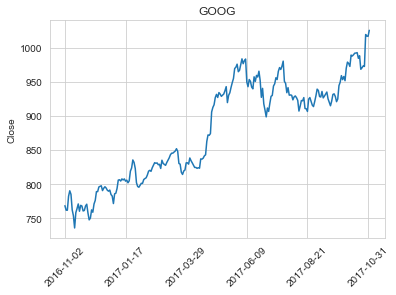

In [7]:
df['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.xticks(rotation=45)
plt.title('GOOG')
plt.show()

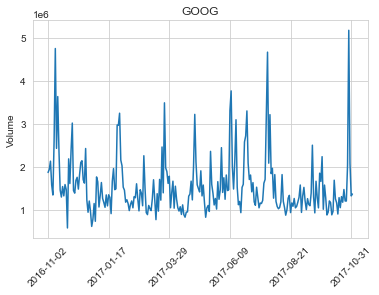

In [8]:
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.xticks(rotation=45)
plt.title('GOOG')
plt.show()

<AxesSubplot:>

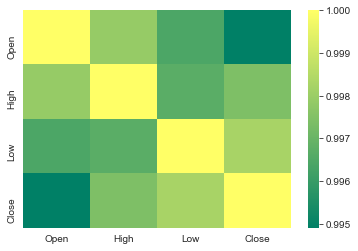

In [9]:
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), cmap='summer')

In [10]:
ma_day = [10, 20, 30, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Close'].rolling(ma).mean()
# print(df.columns)

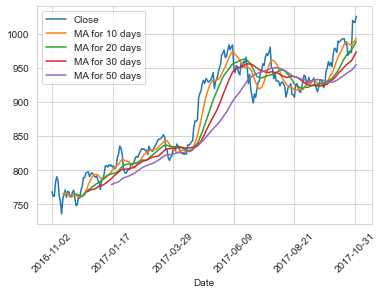

In [11]:
df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot()
plt.xticks(rotation=45)
plt.show()

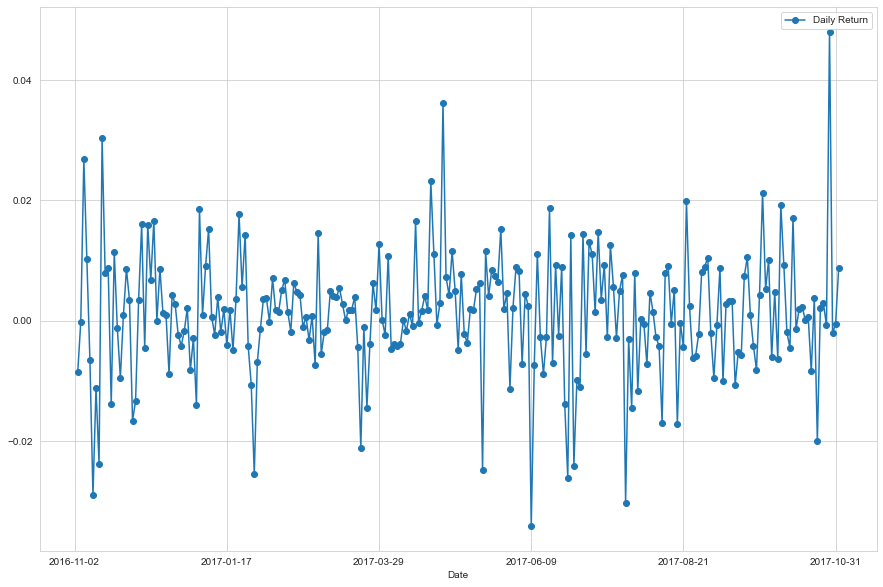

In [12]:
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].plot(legend=True, linestyle='-', marker='o', figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

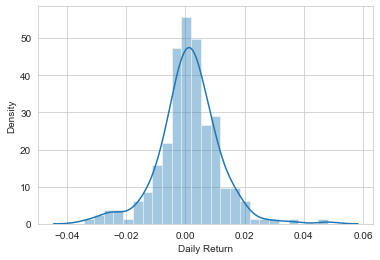

In [13]:
sns.distplot(df['Daily Return'])

<AxesSubplot:>

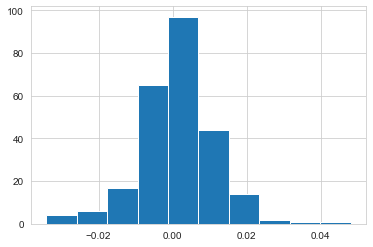

In [14]:
df['Daily Return'].hist()

In [15]:
mean = df['Daily Return'].mean()
std = df['Daily Return'].std()
print('Mean          : ',round(mean, 4))
print('Std deviation : ',round(std, 4))

Mean          :  0.0012
Std deviation :  0.0103


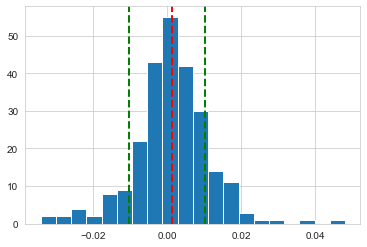

In [16]:
df['Daily Return'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [17]:
df['Daily Return'].kurtosis()

2.797848180065585

In [18]:
data = pd.read_csv('../dataset/GOOG-year.csv')
data = data[['Date', 'Open', 'High', 'Low', 'Close']] 
data['Date'] = pd.to_datetime(data['Date']) 
data.set_index('Date', inplace=True)
data["month"] = pd.to_datetime(data.index).map(lambda x: x.month) 
data["year"] = pd.to_datetime(data.index).map(lambda x: x.isocalendar()[0]) 
grouped = data.groupby(list(set(["year","month"]))) 
plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []})
for name, group in grouped:
    plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))

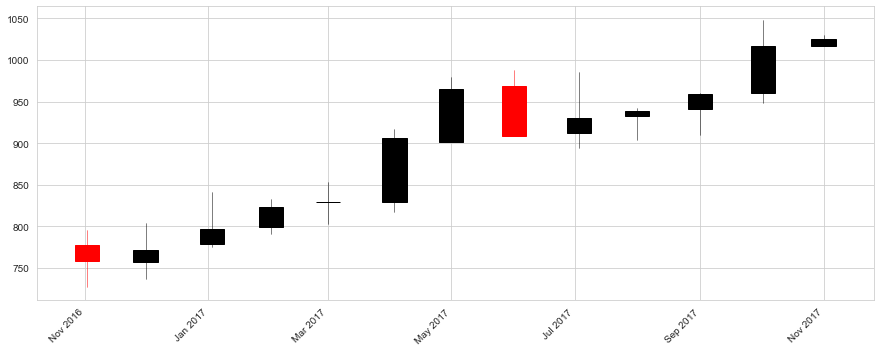

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(bottom=0.2)
weekFormatter = DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(weekFormatter)
ax.grid(True)
candlestick_ohlc(ax, list(
    zip(list(date2num(plotdat.index.tolist())), 
        plotdat["Open"].tolist(), 
        plotdat["High"].tolist(),
        plotdat["Low"].tolist(), 
        plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = 30 * .4)
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()